In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.preprocessing as pp
from sklearn.svm import SVC
sns.set_theme()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [2]:
df = pd.read_csv(r'OJ.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [3]:
df = pd.get_dummies(df, drop_first=True)

In [4]:
train_split, test_split = ms.train_test_split(df, train_size=0.748, random_state=5)
train_split

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase_MM,Store7_Yes
840,268,2,1.86,2.18,0.00,0.0,0,1,0.163840,2.18,1.86,0.32,0.000000,0.000000,0.32,2,0,0
93,244,7,1.86,2.09,0.00,0.2,0,0,0.600000,1.89,1.86,0.03,0.095694,0.000000,0.23,0,0,1
948,262,2,1.86,2.18,0.00,0.6,0,1,0.009319,1.58,1.86,-0.28,0.275229,0.000000,0.32,2,1,0
703,250,3,1.99,2.23,0.00,0.0,0,0,0.001889,2.23,1.99,0.24,0.000000,0.000000,0.24,3,1,0
610,251,7,1.86,2.09,0.10,0.0,0,0,0.600000,2.09,1.76,0.33,0.000000,0.053763,0.23,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,270,7,1.86,2.13,0.27,0.0,1,0,0.939664,2.13,1.59,0.54,0.000000,0.145161,0.27,0,0,1
73,278,4,2.09,2.09,0.20,0.0,0,0,0.855775,2.09,1.89,0.20,0.000000,0.095694,0.00,4,0,0
998,254,7,1.86,2.18,0.00,0.0,0,0,0.544000,2.18,1.86,0.32,0.000000,0.000000,0.32,0,0,1
206,241,7,1.86,2.09,0.00,0.0,0,0,0.813222,2.09,1.86,0.23,0.000000,0.000000,0.23,0,0,1


In [5]:
scaler = pp.StandardScaler()
train_split_norm = scaler.fit_transform(train_split)
test_split_norm = scaler.transform(test_split)

### 2.a

In [71]:
print(train_split.Purchase_MM.value_counts(normalize=True))
print(test_split.Purchase_MM.value_counts(normalize=True))

0    0.60625
1    0.39375
Name: Purchase_MM, dtype: float64
0    0.622222
1    0.377778
Name: Purchase_MM, dtype: float64


### 2.b

In [72]:
np.shape(np.delete(test_split_norm, -2, 1))

(270, 17)

In [6]:
Y_train = train_split.Purchase_MM
X_train = np.delete(train_split_norm, -2, 1)
Y_test = test_split.Purchase_MM
X_test = np.delete(test_split_norm, -2, 1)

In [7]:
svc_model = SVC(C=0.01, kernel='linear')
svc_model.fit(X=X_train, y=Y_train)

SVC(C=0.01, kernel='linear')

In [8]:
len(svc_model.support_vectors_)

447

447 support vectors were discovered. It's a simple model, thus the algorithm samples many points to generate the hyperplane.

In [11]:
svc_model.coef_[0]

array([-0.0931008 , -0.13570556,  0.02166979, -0.02557722, -0.02756968,
        0.08062965, -0.03971877,  0.02339839, -0.88204655, -0.0813733 ,
        0.03853711, -0.09506511,  0.06585108, -0.03177433, -0.05215393,
       -0.01033454, -0.08993376])

In [9]:
2/np.linalg.norm(svc_model.coef_[0])

2.1705754779328017

The width of the margin is given by 2/magnitude of the hyperplane's orthogonal vector. Within sklearn, the coefficients represent the components of this hyperplane. The width of the margin was then calculated to be 2.17.

### 2.c

In [77]:
print(svc_model.score(X_test, Y_test))
print(svc_model.score(X_train, Y_train))

0.8296296296296296
0.82625


The classification scores are very similar for test and training. This makes sense because the soft-margin classification algorithm is using a linear kernel. This is a simple model, meaning that the variance should be low. The small C value means that high regularization penalty was inputted, which results in more points being sampled to generate the hyperplane and margins (simpler model).

### 2.d

In [78]:
svc_cv = SVC(kernel='linear')
precision = 20
param_grid = {'C': np.logspace(-2,1,precision)}
grid_cv = ms.GridSearchCV(svc_cv, param_grid, cv=10, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
results = pd.DataFrame(grid_cv.cv_results_)

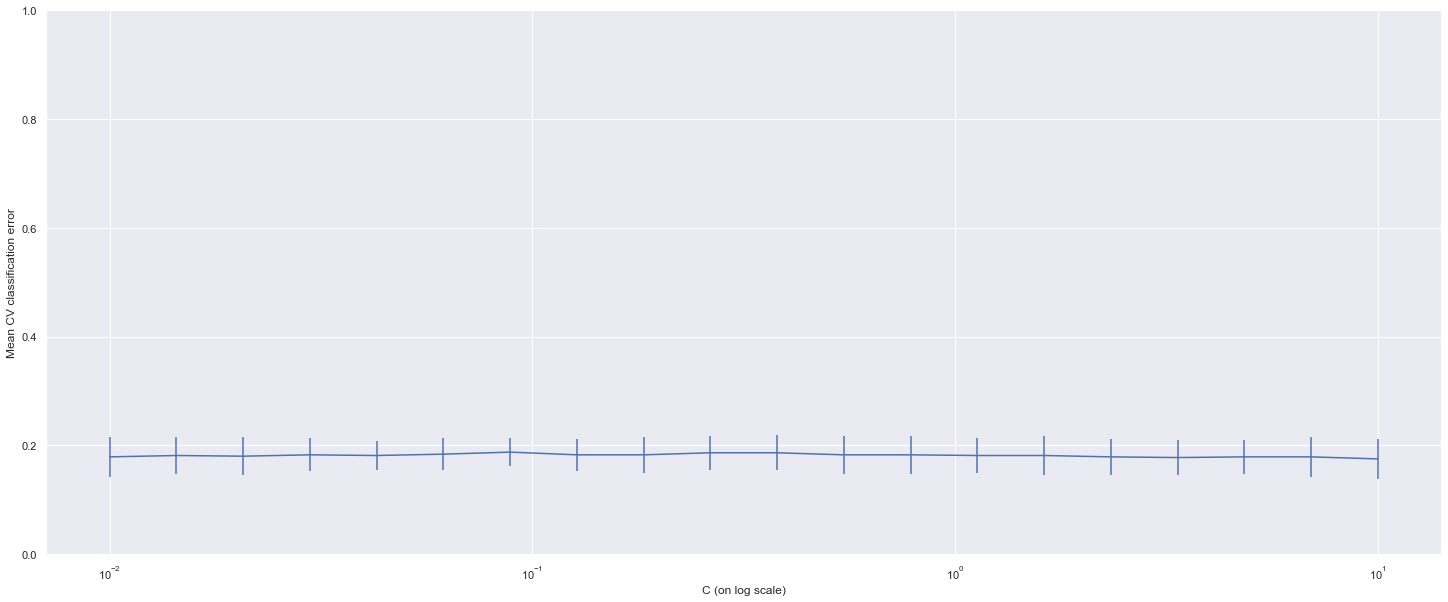

In [79]:
plt.figure(figsize=[25,10])
plt.errorbar(np.logspace(-2,1,precision), 1-results['mean_test_score'], yerr=results['std_test_score'])
plt.ylim([0,1])
# plt.xlim([0,10])
plt.xscale('log')
plt.grid(True)
plt.ylabel('Mean CV classification error')
plt.xlabel('C (on log scale)');
plt.savefig('err1.png')

### 2.e
We can see that the classification performance does not really improve with a more complex model. It appears that with a linear kernel, the dataset is separated rather well. We can thus select the best performer with a linear kernel as C = 0.01. Thus, our classification performance remains the same.

### 2.f
The higher the value of gamma, the smaller value of the RBF function evaluates to. The RBF function returns a measure of how much influence two samples have on each other, in infinite dimensions. Increasing the value of gamma means that pairs of observations are less influential, and the influence decays faster with distance. Thus, the smaller the gamma, the farther training examples can influence the decision boundary. This makes the decision boundary less erratic, and thus simpler.

### 2.g

In [80]:
svc_cv = SVC()
precision = 50
param_grid = {'gamma': np.logspace(-4,1,precision), 'C': np.logspace(-2,1,precision)}
grid_cv = ms.GridSearchCV(svc_cv, param_grid, cv=10, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
results = pd.DataFrame(grid_cv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013603,0.000917,0.004701,0.000458,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,1632
1,0.014803,0.000400,0.004501,0.000500,0.01,0.000126,"{'C': 0.01, 'gamma': 0.00012648552168552957}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,1632
2,0.013202,0.001470,0.004301,0.001005,0.01,0.00016,"{'C': 0.01, 'gamma': 0.00015998587196060574}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,1632
3,0.015403,0.001357,0.004801,0.000872,0.01,0.000202,"{'C': 0.01, 'gamma': 0.00020235896477251576}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,1632
4,0.015003,0.000774,0.005302,0.002003,0.01,0.000256,"{'C': 0.01, 'gamma': 0.0002559547922699536}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,1632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.022705,0.001735,0.004701,0.000458,10.0,3.90694,"{'C': 10.0, 'gamma': 3.906939937054621}",0.7125,0.6875,0.7375,0.8000,0.7125,0.7125,0.7750,0.7375,0.8000,0.7125,0.73875,0.037687,1219
2496,0.023805,0.002359,0.005101,0.001700,10.0,4.941713,"{'C': 10.0, 'gamma': 4.941713361323838}",0.7250,0.6875,0.7375,0.8000,0.7125,0.7125,0.7750,0.7375,0.7750,0.7125,0.73750,0.033541,1230
2497,0.024405,0.003930,0.004501,0.000500,10.0,6.250552,"{'C': 10.0, 'gamma': 6.250551925273976}",0.7375,0.6875,0.7500,0.7875,0.7125,0.7250,0.7750,0.7250,0.8000,0.7125,0.74125,0.034483,1194
2498,0.026206,0.005511,0.004801,0.000400,10.0,7.906043,"{'C': 10.0, 'gamma': 7.9060432109077015}",0.7125,0.6875,0.7625,0.7875,0.7250,0.7125,0.7750,0.7250,0.8000,0.7000,0.73875,0.037270,1229


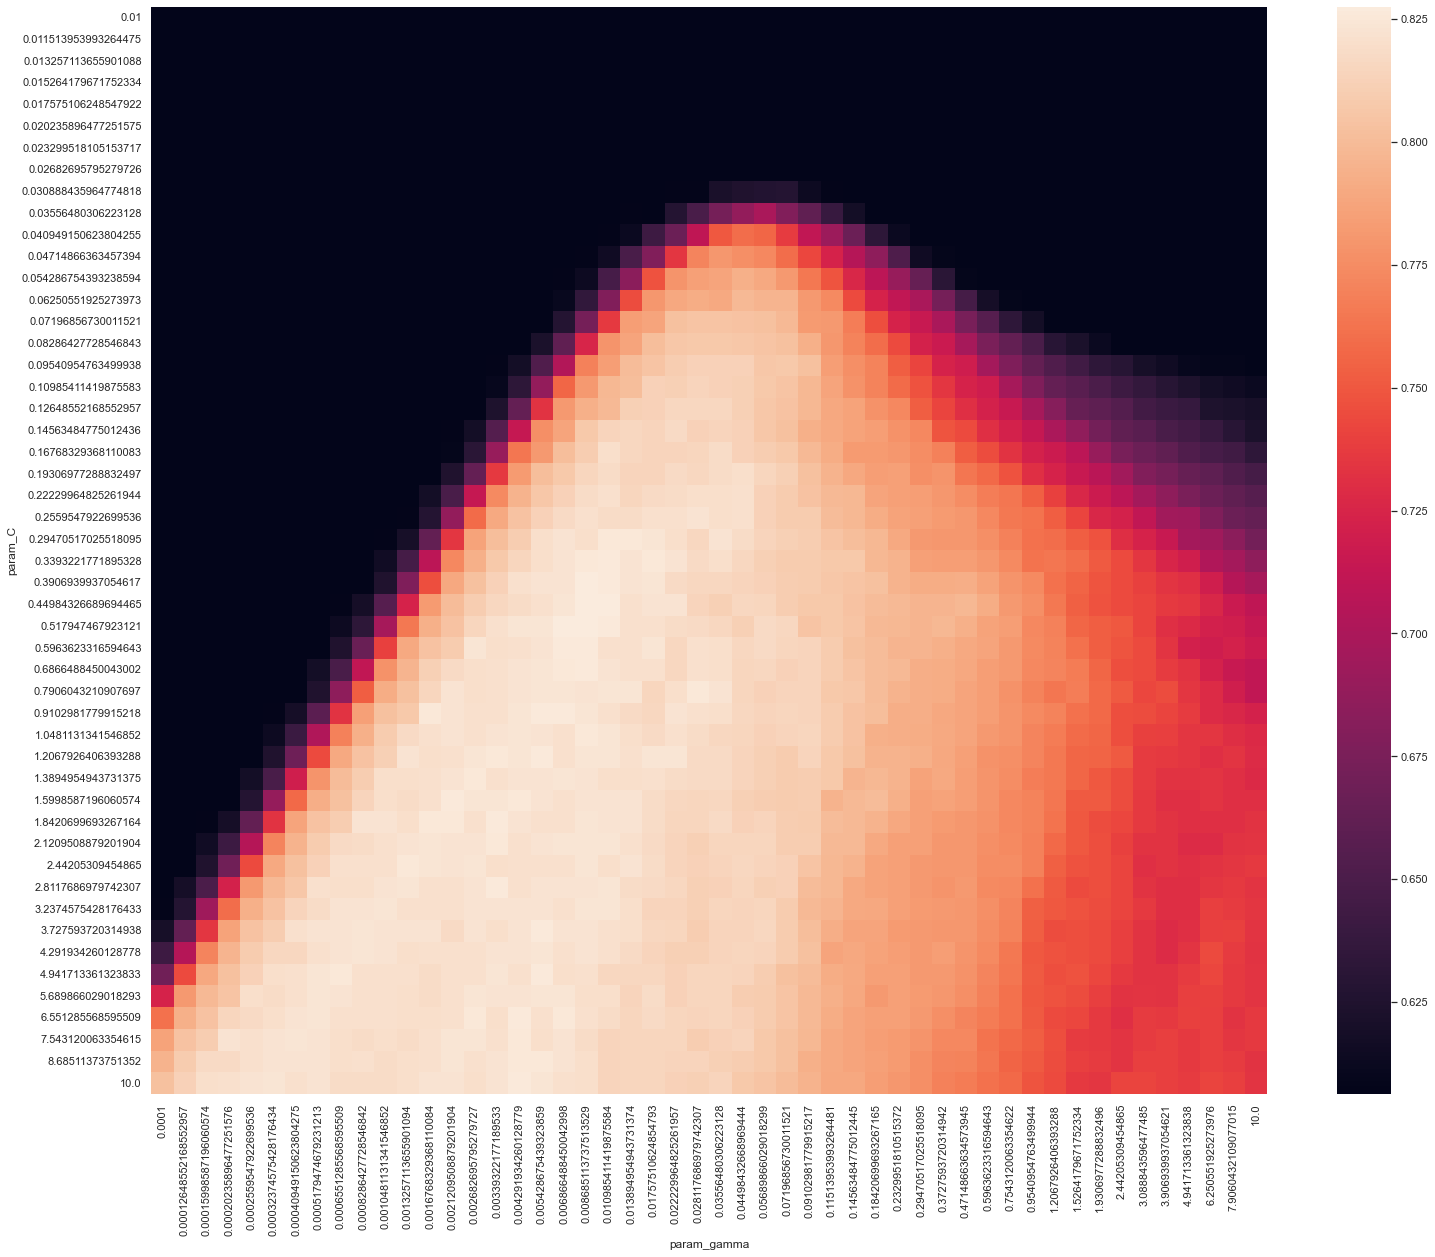

In [81]:
plt.figure(figsize=[25,20])
sns.heatmap(results[['param_C','param_gamma','mean_test_score']].pivot(index='param_C', columns='param_gamma', values='mean_test_score'))
plt.savefig('cmap1.png')

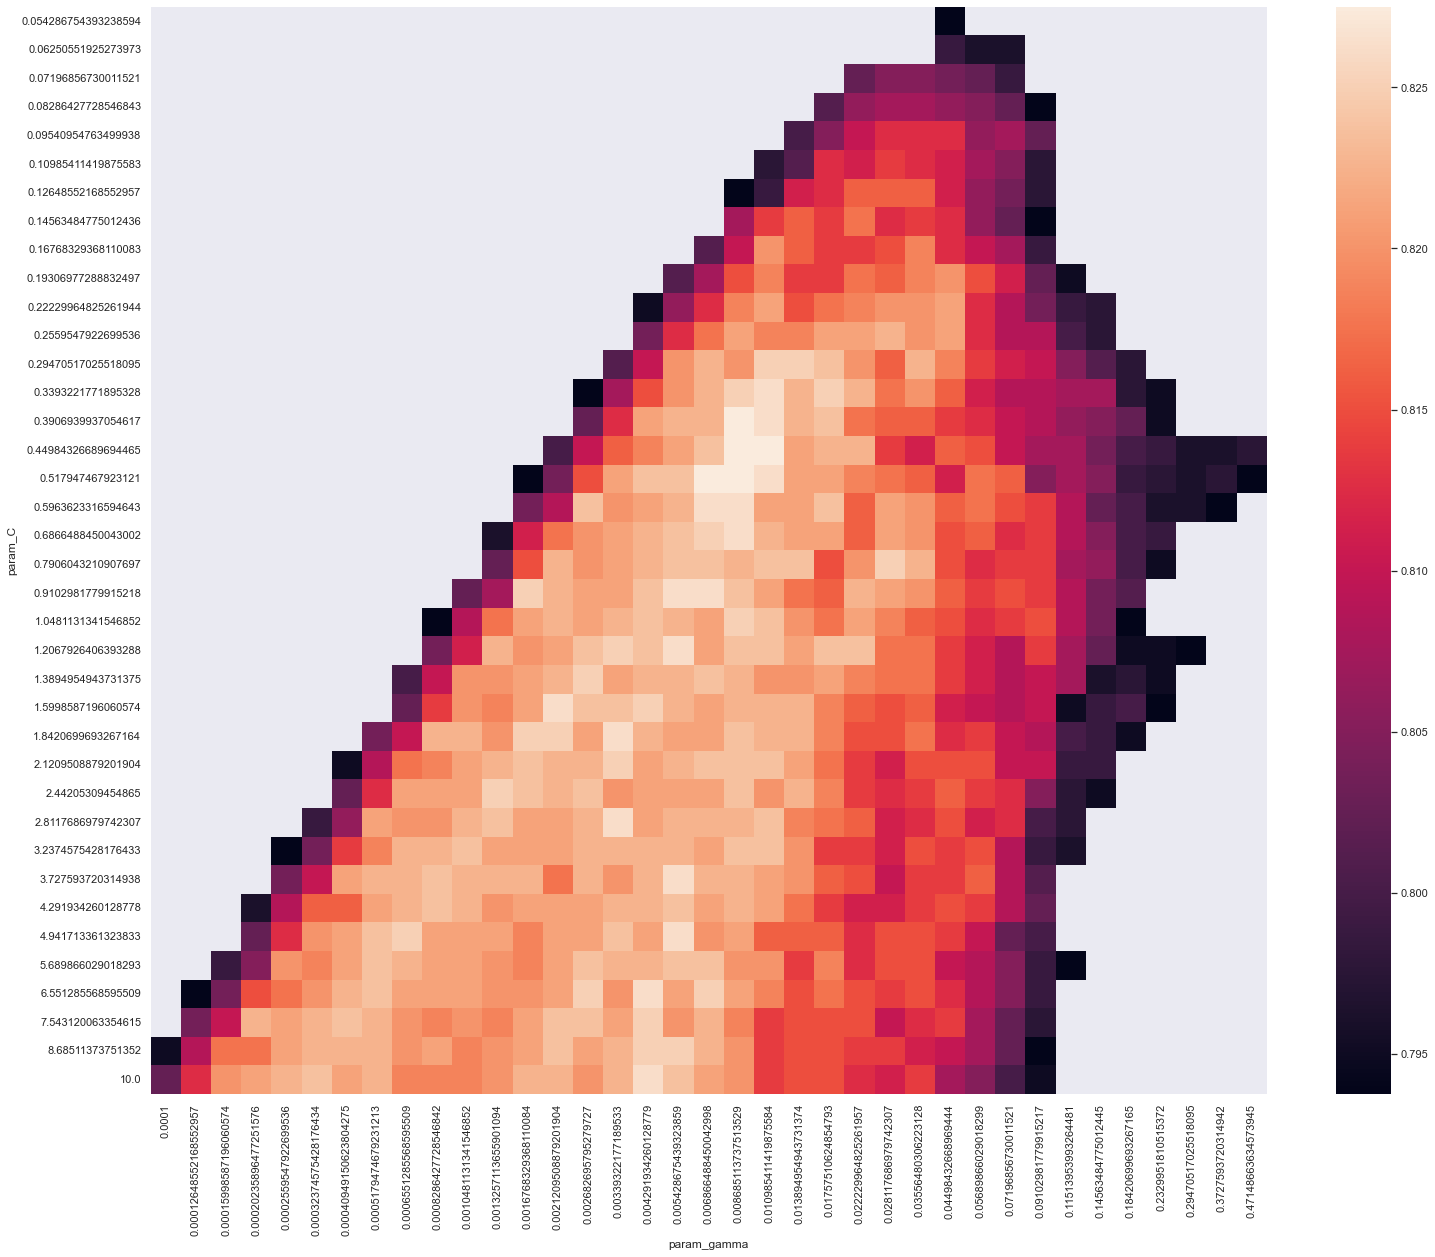

In [82]:
sorted_results = results.sort_values(by='mean_test_score', axis=0, ascending=False)
acceptable = sorted_results.loc[sorted_results['mean_test_score'] > (sorted_results['mean_test_score'].iloc[0] - sorted_results['std_test_score'].iloc[0])]
plt.figure(figsize=[25,20])
sns.heatmap(acceptable[['param_C','param_gamma','mean_test_score']].pivot(index='param_C', columns='param_gamma', values='mean_test_score'))
plt.savefig('cmap2.png')

There appears to be a wide range of acceptable combinations of C and gamma. However, a particularly good C value to iterate over appears to be 0.45. I will thus fix C to 0.45 and apply the one-standard-error rule.

In [83]:
svc_select_gamma = SVC(C=0.45)
precision = 100
param_grid = {'gamma': np.logspace(-3,1,precision)}
grid_cv = ms.GridSearchCV(svc_select_gamma, param_grid, cv=10, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
results = pd.DataFrame(grid_cv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013403,0.000490,0.004601,0.000490,0.001,{'gamma': 0.001},0.6375,0.6375,0.6750,0.6875,0.6750,0.6500,0.6625,0.6125,0.6625,0.6000,0.65000,0.026810,100
1,0.014903,0.000539,0.004701,0.000458,0.001097,{'gamma': 0.0010974987654930556},0.6625,0.6500,0.7000,0.6875,0.7000,0.6625,0.6625,0.6250,0.6750,0.6125,0.66375,0.027642,99
2,0.016704,0.004475,0.004701,0.001005,0.001205,{'gamma': 0.0012045035402587824},0.6875,0.7000,0.7375,0.7000,0.7250,0.6625,0.7375,0.6625,0.7000,0.6375,0.69500,0.031721,98
3,0.014803,0.000600,0.004802,0.000600,0.001322,{'gamma': 0.0013219411484660286},0.7250,0.7000,0.7625,0.7625,0.7500,0.7000,0.7500,0.7000,0.7250,0.6625,0.72375,0.031350,93
4,0.014203,0.000600,0.004201,0.000980,0.001451,{'gamma': 0.0014508287784959402},0.7625,0.7000,0.7750,0.7625,0.7750,0.7125,0.7750,0.7250,0.8125,0.6625,0.74625,0.042592,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.020204,0.003371,0.005701,0.000641,6.892612,{'gamma': 6.892612104349702},0.7750,0.7000,0.7625,0.7625,0.7125,0.7125,0.7000,0.7250,0.7625,0.6625,0.72750,0.034821,91
96,0.021305,0.003466,0.005601,0.000664,7.564633,{'gamma': 7.56463327554629},0.7375,0.7125,0.7500,0.7625,0.7125,0.7000,0.6750,0.7125,0.7750,0.6500,0.71875,0.036764,94
97,0.020305,0.003379,0.005701,0.000458,8.302176,{'gamma': 8.302175681319753},0.7250,0.6875,0.7500,0.7625,0.7125,0.7125,0.6750,0.7000,0.7750,0.6625,0.71625,0.035377,95
98,0.020004,0.000447,0.004901,0.000700,9.111628,{'gamma': 9.111627561154895},0.7250,0.6875,0.7625,0.7500,0.7000,0.7125,0.6750,0.7000,0.7625,0.6500,0.71250,0.035795,96


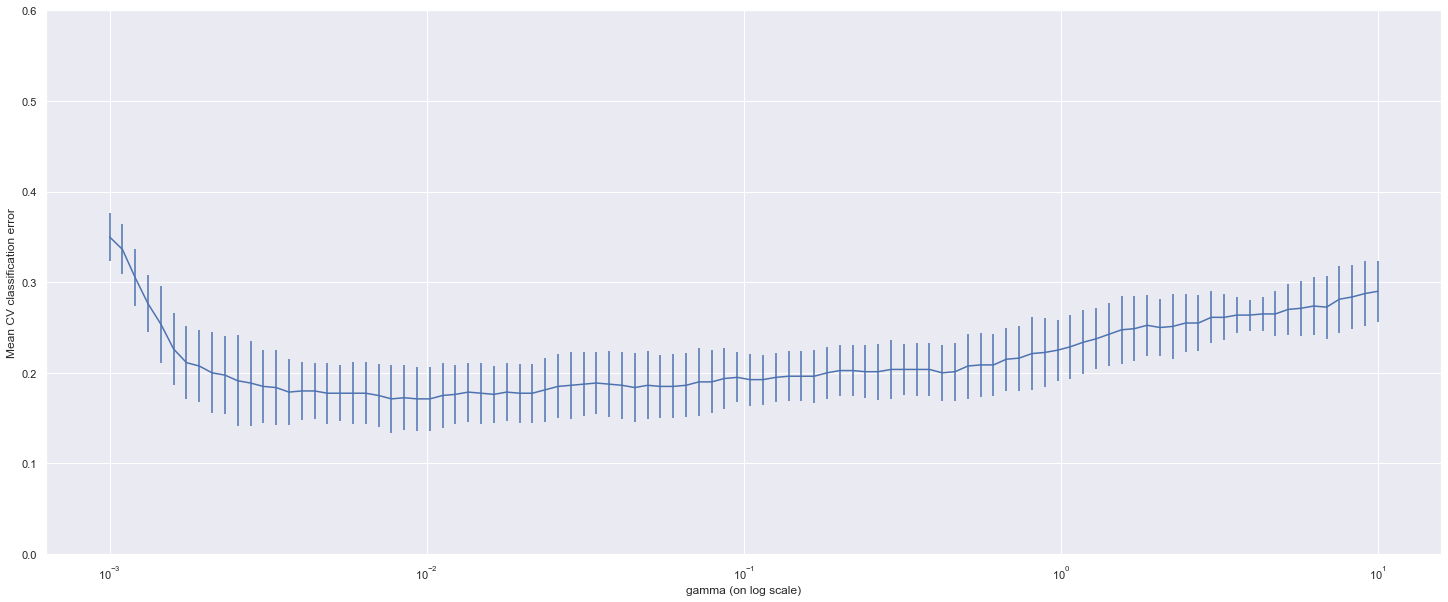

In [84]:
plt.figure(figsize=[25,10])
plt.errorbar(param_grid['gamma'], 1-results['mean_test_score'], yerr=results['std_test_score'])
plt.ylim([0,0.6])
# plt.xlim([0,10])
plt.xscale('log')
plt.grid(True)
plt.ylabel('Mean CV classification error')
plt.xlabel('gamma (on log scale)')
plt.savefig('err2.png')

In [85]:
sorted_results = results.sort_values(by='mean_test_score', axis=0, ascending=False)
acceptable = sorted_results.loc[sorted_results['mean_test_score'] > (sorted_results['mean_test_score'].iloc[0] - sorted_results['std_test_score'].iloc[0])]
acceptable.sort_values(by='param_gamma', axis=0).iloc[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.015303,0.001269,0.004101,0.000944,0.002105,{'gamma': 0.00210490414451202},0.8375,0.775,0.8000,0.8250,0.7375,0.7750,0.8125,0.8375,0.8750,0.725,0.80000,0.044721,48
9,0.014503,0.001025,0.004401,0.001020,0.00231,{'gamma': 0.0023101297000831605},0.8375,0.775,0.8125,0.8250,0.7500,0.7750,0.8125,0.8375,0.8750,0.725,0.80250,0.043229,47
10,0.013903,0.001922,0.004301,0.000458,0.002535,{'gamma': 0.0025353644939701114},0.8375,0.775,0.8125,0.8375,0.7500,0.7625,0.8500,0.8500,0.8875,0.725,0.80875,0.050016,38


The simplest gamma value with an acceptable accuracy appears to be 0.0021. It achieved a classification accuracy of 0.80.

### 2.h

In [86]:
svc_cv_poly = SVC(kernel='poly', degree=2)
precision = 50
param_grid = {'gamma': np.logspace(-3, -1,precision), 'C': np.logspace(-2,2,precision)}
grid_cv = ms.GridSearchCV(svc_cv_poly, param_grid, cv=10, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
results = pd.DataFrame(grid_cv.cv_results_)

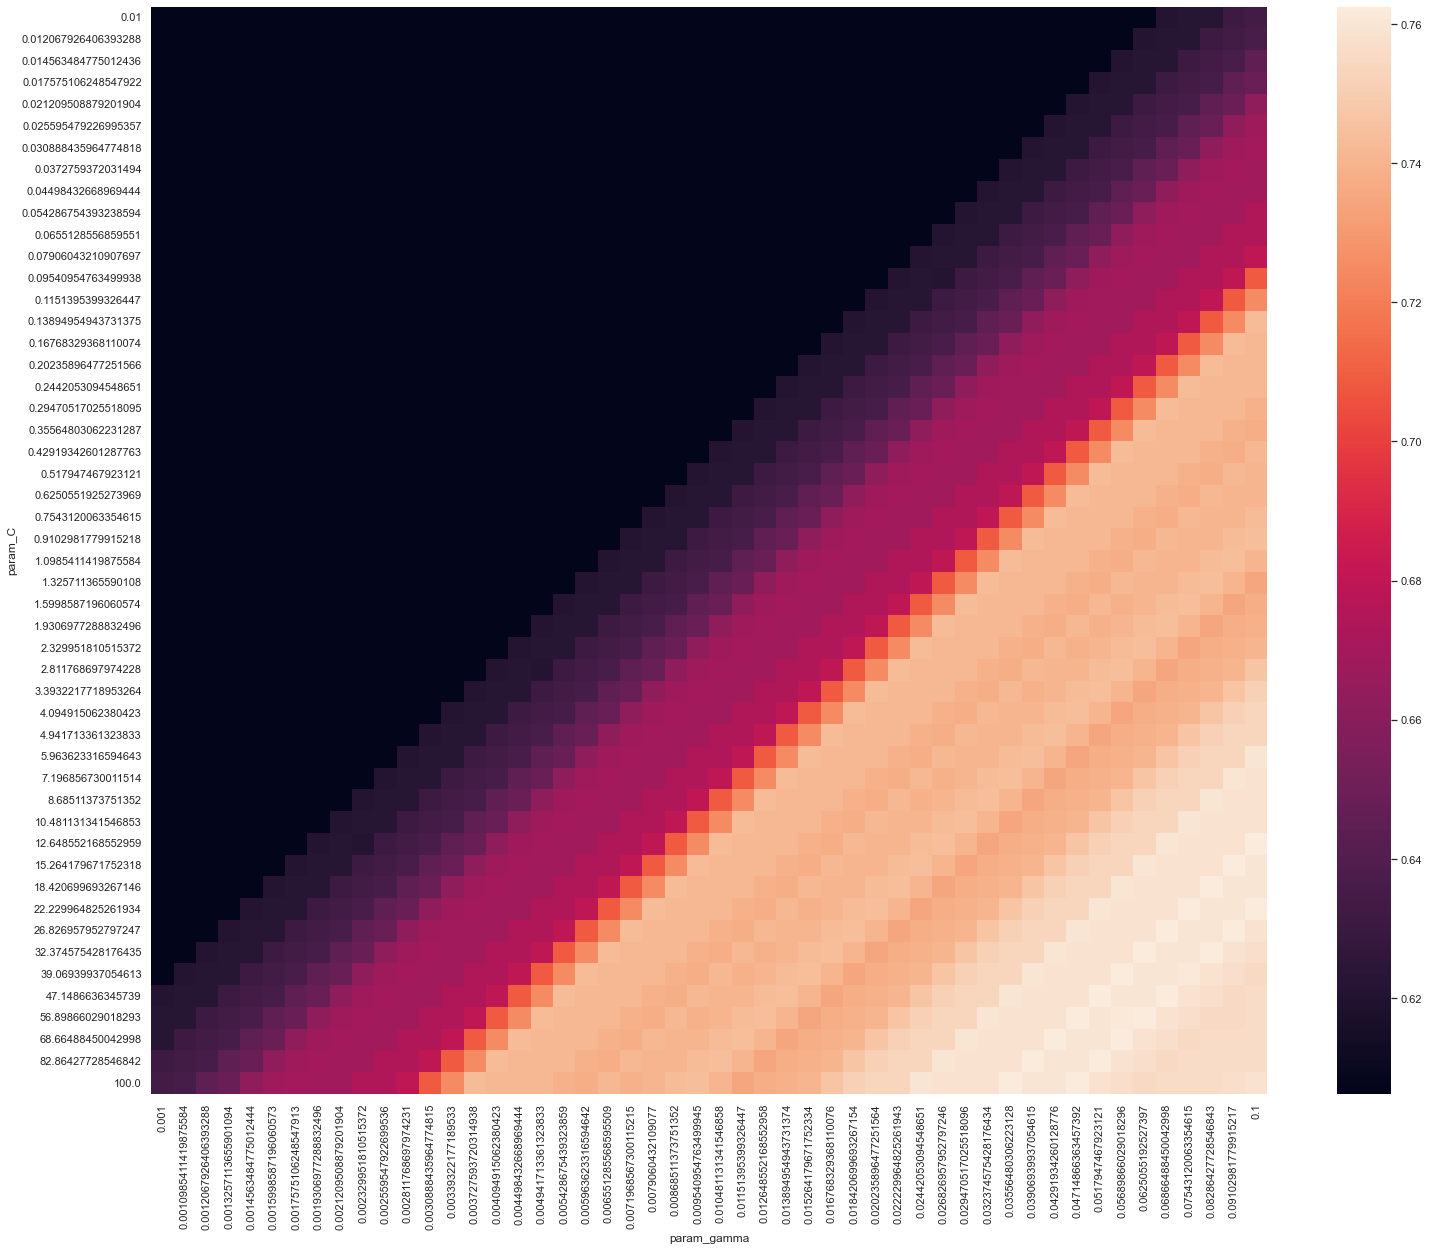

In [87]:
plt.figure(figsize=[25,20])
sns.heatmap(results[['param_C','param_gamma','mean_test_score']].pivot(index='param_C', columns='param_gamma', values='mean_test_score'))
plt.savefig('cmap3.png')

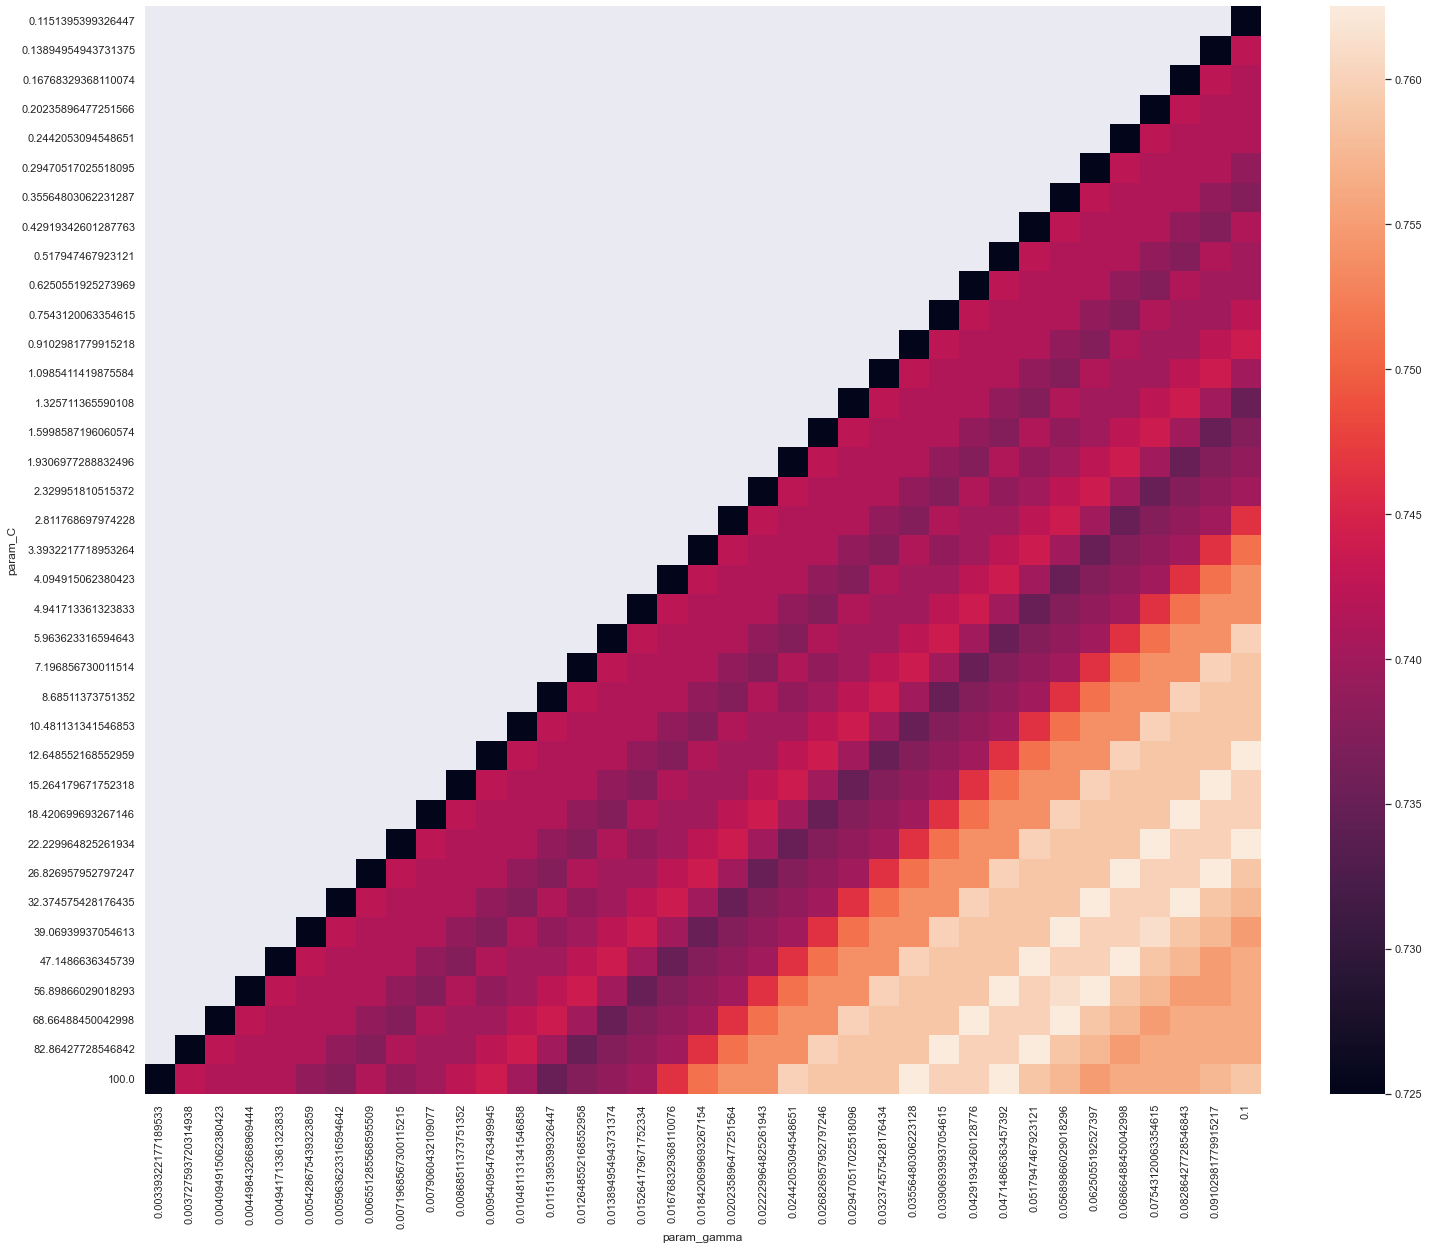

In [88]:
sorted_results = results.sort_values(by='mean_test_score', axis=0, ascending=False)
acceptable = sorted_results.loc[sorted_results['mean_test_score'] > (sorted_results['mean_test_score'].iloc[0] - sorted_results['std_test_score'].iloc[0])]
plt.figure(figsize=[25,20])
sns.heatmap(acceptable[['param_C','param_gamma','mean_test_score']].pivot(index='param_C', columns='param_gamma', values='mean_test_score'))
plt.savefig('cmap4.png')

Optimal C and gamma combinations appear to lie along a clear linear relationship between C and gamma. Higher values of gamma could be more higher performing, however the SVC model took an exponentially longer time to run the higher the gamma value. I will select a relatively high C value to hold constant - about 100 - such that there is a wide range of acceptable gamma values that are less than 1 (to keep the model running quickly).

In [89]:
svc_select_gamma = SVC(kernel='poly', C=100)
precision = 50
param_grid = {'gamma': np.logspace(-4,-1,precision)}
grid_cv = ms.GridSearchCV(svc_select_gamma, param_grid, cv=10, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
results = pd.DataFrame(grid_cv.cv_results_)

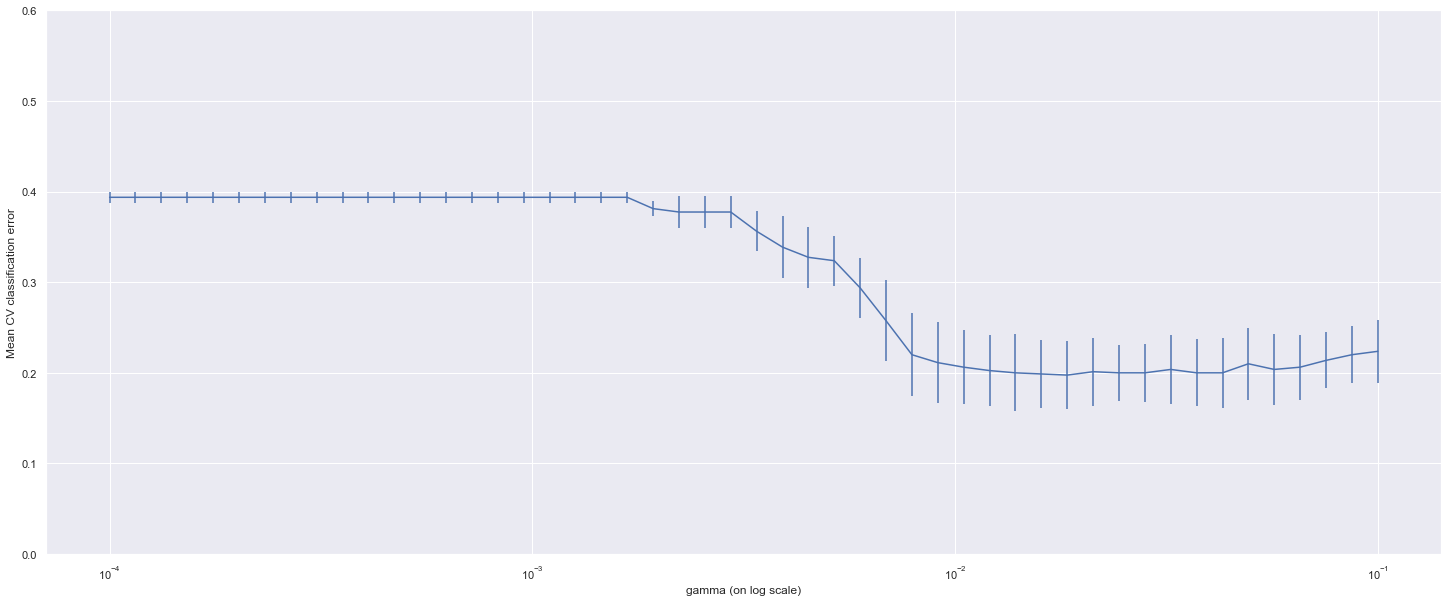

In [90]:
plt.figure(figsize=[25,10])
plt.errorbar(param_grid['gamma'], 1-results['mean_test_score'], yerr=results['std_test_score'])
plt.ylim([0,0.6])
# plt.xlim([0,10])
plt.xscale('log')
plt.grid(True)
plt.ylabel('Mean CV classification error')
plt.xlabel('gamma (on log scale)');
plt.savefig('err3.png')

In [91]:
sorted_results = results.sort_values(by='mean_test_score', axis=0, ascending=False)
acceptable = sorted_results.loc[sorted_results['mean_test_score'] > (sorted_results['mean_test_score'].iloc[0] - sorted_results['std_test_score'].iloc[0])]
acceptable.sort_values(by='param_gamma', axis=0).iloc[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
31,0.010702,0.000458,0.0012,0.000400,0.007906,{'gamma': 0.0079060432109077},0.8250,0.7250,0.8125,0.7875,0.7500,0.775,0.7750,0.8250,0.8375,0.6875,0.78000,0.045826,17
32,0.010402,0.000490,0.0014,0.000490,0.009103,{'gamma': 0.009102981779915217},0.8125,0.7625,0.8250,0.8000,0.7500,0.775,0.8000,0.8250,0.8500,0.6875,0.78875,0.044529,15
33,0.011703,0.003823,0.0013,0.000458,0.010481,{'gamma': 0.010481131341546853},0.8125,0.7625,0.8250,0.8000,0.7875,0.775,0.7875,0.8375,0.8500,0.7000,0.79375,0.040793,12


I selected with the one-standard-error rule optimal parameters of C = 100 and gamma = 0.0079. This achieves a mean CV score of 0.78.

### 2.i
To select the best model, I will test on the test split.

In [92]:
best_linear_svc = SVC(kernel='linear', C=0.01)
best_rbf_svc = SVC(kernel='rbf', C=0.45, gamma=0.002105)
best_poly_svc = SVC(kernel='poly', C=100, gamma=0.007906)
best_linear_svc.fit(X_train, Y_train)
best_rbf_svc.fit(X_train, Y_train)
best_poly_svc.fit(X_train, Y_train)
print(best_linear_svc.score(X_test, Y_test))
print(best_rbf_svc.score(X_test, Y_test))
print(best_poly_svc.score(X_test, Y_test))

0.8296296296296296
0.8296296296296296
0.825925925925926


Every model appears to be performing within margin of error. I would thus select an RBF kernel with parameters C = 0.45 and gamma = 0.002105 because RBF tended to be the fastest kernel option in my testing.


















